In [1]:
from lifelines.datasets import load_rossi
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
rossi = load_rossi()

- 다음의 자료는 1970년대 교도소에서 석방된 432명의 수감자 데이터
- 석방 후 1년 간의 추적 관찰한 데이터
- 수감자 중 절반은 무작위로 실험 치료를 받았고 절반은 치료를 받지 못함
- arrest가 재수감 여부를 나타내는 것이고 이 변수가 y라고 볼 수 있음

In [3]:
rossi.head(5)

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


- KaplanMeier Plot 그리기

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

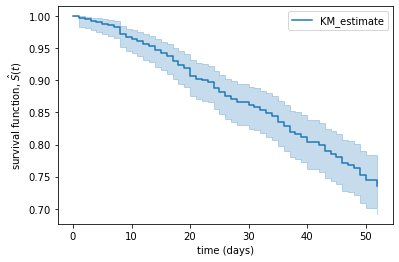

In [5]:
kmf = KaplanMeierFitter()
kmf.fit(rossi['week'],rossi['arrest'])
plot = kmf.plot_survival_function()
plot.set_xlabel('time (days)')
plot.set_ylabel('survival function, $\hat{S}(t)$')
plot

- 상담 지원여부에 따른 KaplanMeier Plot

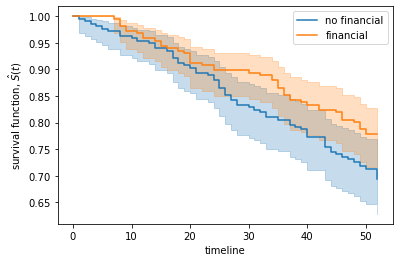

In [6]:
fin_0 = rossi.loc[rossi['fin']==0,:]
fin_1 = rossi.loc[rossi['fin']==1,:]

fin_0_kmf = KaplanMeierFitter()
fin_0_kmf.fit(fin_0['week'],fin_0['arrest'], label = 'no financial')
ax = fin_0_kmf.plot_survival_function()
ax.set_xlabel('time (days)')
ax.set_ylabel('survival function, $\hat{S}(t)$')

fin_1_kmf = KaplanMeierFitter()
fin_1_kmf.fit(fin_1['week'],fin_1['arrest'], label = 'financial')
ax = fin_1_kmf.plot_survival_function(ax=ax)

- Cox Regression fitting

In [7]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col = 'week', event_col = 'arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2022-05-11 13:45:51 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

- 직접적인 linear regression 수식을 지정해줄 수 있음

In [8]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col = 'week', event_col = 'arrest'
       ,formula = 'fin + age + wexp + age*prio')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.39
         time fit was run = 2022-05-11 13:45:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.03       0.97       0.03            -0.09             0.03                 0.92                 1.03
fin        -0.33       0.72       0.19            -0.70             0.04                 0.49                 1.05
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
wexp       -0.24       0.79       0.21            -0.65             0.17                 0.52                 1.19
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -0.93 0.35       1.51
fin           0.00 -1.73 0.08       3.57
prio          0.00  1.80 0.07       3.80
wexp          0.00 -1.14 0.26       1.97
age:prio      0.00 -1.28 0.20       2.32
---
Concordance = 0.64
Partial AIC = 1328.77
log-likelihood ratio test = 31.99 on 5 df
-log2(p) of ll-ratio test = 17.35

<AxesSubplot:xlabel='log(HR) (95% CI)'>

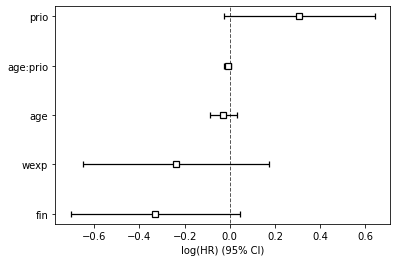

In [34]:
cph.plot()

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



C:\Users\seolbluewings\anaconda3\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
               test_statistic      p  -log2(p)
age      km             12.26 <0.005     11.08
         rank           12.77 <0.005     11.47
age:prio km              2.02   0.16      2.69
         rank            2.17   0.14      2.83
fin      km              0.01   0.94      0.09
         rank            0.01   0.92      0.12
prio     km              2.11   0.15      2.77
         rank            2.26   0.13      2.91
wexp     km             10.08 <0.005      9.38
         rank            9.98 <0.005      9.30



1. Variable 'age' failed the non-proportional test: p-value is 0.0004.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0015.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/l

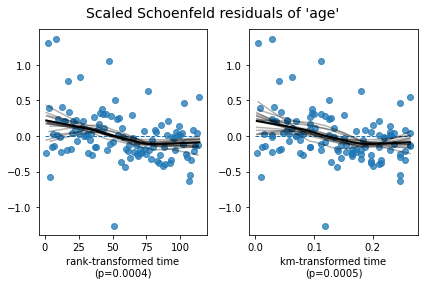

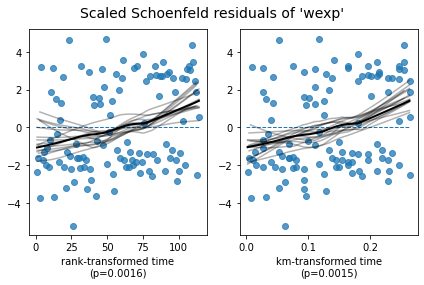

In [36]:
axes = cph.check_assumptions(rossi, show_plots = True)

- Goodness of Fit은 엄밀하게 보아 수행하는 것이 옳지만, 단순 예측만을 목표로 사용할 때는 생략 가능한 것으로 알려져 있음
- prediction 수행 시, predict_survival_function() 통해 시간에 따른 생존함수값을 return 받음

In [14]:
cph.predict_survival_function(rossi).transpose()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,52.0
0,0.997616,0.995230,0.992848,0.990468,0.988085,0.985699,0.983305,0.971402,0.966614,0.964223,...,0.784733,0.774567,0.769460,0.764349,0.754116,0.751552,0.746427,0.733641,0.725969,0.715699
1,0.993695,0.987411,0.981162,0.974941,0.968739,0.962552,0.956370,0.926001,0.913958,0.907978,...,0.526079,0.508214,0.499383,0.490641,0.473429,0.469176,0.460745,0.440128,0.428038,0.412181
2,0.994083,0.988183,0.982314,0.976468,0.970639,0.964820,0.959004,0.930402,0.919043,0.913399,...,0.547334,0.529874,0.521230,0.512664,0.495770,0.491589,0.483296,0.462975,0.451031,0.435335
3,0.999045,0.998089,0.997133,0.996176,0.995216,0.994254,0.993287,0.988460,0.986508,0.985531,...,0.907577,0.902855,0.900469,0.898071,0.893242,0.892026,0.889587,0.883460,0.879752,0.874752
4,0.997626,0.995250,0.992878,0.990507,0.988135,0.985758,0.983374,0.971520,0.966752,0.964370,...,0.785530,0.775396,0.770304,0.765209,0.755007,0.752451,0.747341,0.734592,0.726942,0.716702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.999184,0.998366,0.997548,0.996729,0.995909,0.995085,0.994258,0.990125,0.988453,0.987616,...,0.920433,0.916337,0.914266,0.912184,0.907989,0.906932,0.904812,0.899481,0.896252,0.891896
428,0.997033,0.994065,0.991105,0.988147,0.985189,0.982227,0.979258,0.964523,0.958609,0.955657,...,0.739499,0.727592,0.721624,0.715661,0.703753,0.700776,0.694831,0.680046,0.671203,0.659404
429,0.998866,0.997730,0.996595,0.995458,0.994319,0.993177,0.992030,0.986304,0.983991,0.982833,...,0.891176,0.885670,0.882890,0.880098,0.874478,0.873063,0.870229,0.863112,0.858810,0.853014
430,0.998170,0.996337,0.994507,0.992676,0.990843,0.989006,0.987162,0.977978,0.974277,0.972426,...,0.830240,0.821973,0.817810,0.813638,0.805265,0.803163,0.798956,0.788432,0.782096,0.773592


- proportional hazard assumption을 만족하지 않으나, effect를 추정하고자할 때
- stratification 조치를 취할 수 있음

In [30]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col = 'week', event_col = 'arrest', strata= ['wexp']
       ,formula = 'fin + age + age*prio')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
                   strata = ['wexp']
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -581.57
         time fit was run = 2022-05-10 14:00:35 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.03       0.97       0.03            -0.09             0.03                 0.91                 1.03
fin        -0.33       0.72       0.19            -0.71             0.04                 0.49                 1.04
prio        0.31       1.36       0.17            -0.03             0.64                 0.97                 1.90
age:prio   -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -0.97 0.33       1.59
fin           0.00 -1.74 0.08       3.60
prio          0.00  1.80 0.07       3.81
age:prio      0.00 -1.28 0.20       2.33
---
Concordance = 0.60
Partial AIC = 1171.14
log-likelihood ratio test = 22.41 on 4 df
-log2(p) of ll-ratio test = 12.56

- age 변수에 대한 basis spline 처리 
- age 변수에 대한 spline 처리를 함으로써 non-linear한 형태를 만들 수 있음

In [9]:
cph.fit(rossi, 'week', 'arrest', strata=['wexp'], formula="bs(age, df=4, lower_bound=10, upper_bound=50) + fin +race + mar + paro + prio")
cph.print_summary(model="spline_model"); print()
cph.check_assumptions(rossi, show_plots=True, p_value_threshold=0.05)

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
                   strata = ['wexp']
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -579.36
         time fit was run = 2022-05-11 13:46:19 UTC
                    model = spline_model

---
                                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                
bs(age, df=4, lower_bound=10, upper_bound=50)[1]  -2.95       0.05       8.32           -19.26            13.37                 0.00             6.39e+05
bs(age, df=4, lower_bound=10, upper_bound=50)[2]  -5.48       0.00       6.23           -17.69             6.73                 0.00               839.48
bs(age, df=4, lower_bound=10, upper_bound=50)[3]  -3.69       0.03       8.88           -21.10            13.72                 0.00             9.09e+05
bs(age, df=4, lower_bound=10, upper_bound=50)[4]  -6.02       0.00       6.75           -19.26             7.21                 0.00              1351.35
fin                                               -0.37       0.69       0.19            -0.75             0.01                 0.47                 1.01
mar                                               -0.39       0.67       0.38            -1.15             0.36                 0.32                 1.43
paro                                              -0.10       0.90       0.20            -0.49             0.28                 0.61                 1.33
prio                                               0.09       1.10       0.03             0.04             0.15                 1.04                 1.16
race                                               0.35       1.42       0.31            -0.26             0.95                 0.77                 2.60

                                                   cmp to     z      p   -log2(p)
covariate                                                                        
bs(age, df=4, lower_bound=10, upper_bound=50)[1]     0.00 -0.35   0.72       0.47
bs(age, df=4, lower_bound=10, upper_bound=50)[2]     0.00 -0.88   0.38       1.40
bs(age, df=4, lower_bound=10, upper_bound=50)[3]     0.00 -0.42   0.68       0.56
bs(age, df=4, lower_bound=10, upper_bound=50)[4]     0.00 -0.89   0.37       1.43
fin                                                  0.00 -1.93   0.05       4.22
mar                                                  0.00 -1.02   0.31       1.71
paro                                                 0.00 -0.53   0.60       0.75
prio                                                 0.00  3.22 <0.005       9.59
race                                                 0.00  1.13   0.26       1.95
---
Concordance = 0.62
Partial AIC = 1176.72
log-likelihood ratio test = 26.82 on 9 df
-log2(p) of ll-ratio test = 9.38


Proportional hazard assumption looks okay.


C:\Users\seolbluewings\anaconda3\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


[]

- to_episodic_format 으로 데이터를 episodic format 형태로 변경해줌

In [11]:
from lifelines.utils import to_episodic_format
rossi_long = to_episodic_format(rossi, duration_col='week', event_col='arrest', time_gaps=1.)
rossi_long.head(15)

,stop,start,arrest,age,fin,id,mar,paro,prio,race,wexp
0,1.0,0.0,0,27,0,0,0,1,3,1,0
1,2.0,1.0,0,27,0,0,0,1,3,1,0
2,3.0,2.0,0,27,0,0,0,1,3,1,0
3,4.0,3.0,0,27,0,0,0,1,3,1,0
4,5.0,4.0,0,27,0,0,0,1,3,1,0
5,6.0,5.0,0,27,0,0,0,1,3,1,0
6,7.0,6.0,0,27,0,0,0,1,3,1,0
7,8.0,7.0,0,27,0,0,0,1,3,1,0
8,9.0,8.0,0,27,0,0,0,1,3,1,0
9,10.0,9.0,0,27,0,0,0,1,3,1,0


In [12]:
rossi_long['time*age'] = rossi_long['age'] * rossi_long['stop']

In [15]:
rossi_long.head(5)

,stop,start,arrest,age,fin,id,mar,paro,prio,race,wexp,time*age
0,1.0,0.0,0,27,0,0,0,1,3,1,0,27.0
1,2.0,1.0,0,27,0,0,0,1,3,1,0,54.0
2,3.0,2.0,0,27,0,0,0,1,3,1,0,81.0
3,4.0,3.0,0,27,0,0,0,1,3,1,0,108.0
4,5.0,4.0,0,27,0,0,0,1,3,1,0,135.0


- interaction term을 생성한 후
- CoxTimeVaryingFitter를 통해서 모델을 적합시킴

In [13]:
from lifelines import CoxTimeVaryingFitter
ctv = CoxTimeVaryingFitter()
ctv.fit(rossi_long,id_col='id',
        event_col='arrest',start_col='start',stop_col='stop',strata=['wexp'])
ctv.print_summary(3, model="age * time interaction")

<lifelines.CoxTimeVaryingFitter: fitted with 19809 periods, 432 subjects, 114 events>
         event col = 'arrest'
            strata = ['wexp']
number of subjects = 432
 number of periods = 19809
  number of events = 114
partial log-likelihood = -575.080
  time fit was run = 2022-05-11 14:08:36 UTC
             model = age * time interaction

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        0.073      1.075      0.040           -0.005            0.151                0.995                1.163
fin       -0.386      0.680      0.191           -0.760           -0.011                0.468                0.989
mar       -0.397      0.672      0.382           -1.147            0.352                0.318                1.422
paro      -0.098      0.907      0.196           -0.481            0.285                0.618                1.330
prio       0.090      1.094      0.029            0.034            0.146                1.035                1.158
race       0.295      1.343      0.308           -0.310            0.899                0.733                2.458
time*age  -0.005      0.995      0.002           -0.008           -0.002                0.992                0.998

            cmp to      z     p   -log2(p)
covariate                                 
age          0.000  1.830 0.067      3.893
fin          0.000 -2.018 0.044      4.520
mar          0.000 -1.039 0.299      1.743
paro         0.000 -0.501 0.616      0.698
prio         0.000  3.152 0.002      9.267
race         0.000  0.955 0.340      1.558
time*age     0.000 -3.337 0.001     10.203
---
Partial AIC = 1164.160
log-likelihood ratio test = 35.386 on 7 df
-log2(p) of ll-ratio test = 16.689

<AxesSubplot:xlabel='log(HR) (95% CI)'>

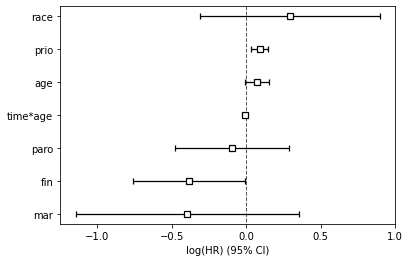

In [14]:
ctv.plot()